# Validate parquet files

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from plantclef.spark import get_spark

spark = get_spark()
display(spark)

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/02/22 20:06:55 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
25/02/22 20:06:56 WARN SparkConf: Note that spark.local.dir will be overridden by the value set by the cluster manager (via SPARK_LOCAL_DIRS in mesos/standalone/kubernetes and LOCAL_DIRS in YARN).
25/02/22 20:07:03 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


In [3]:
import os
from pathlib import Path

# Get list of stored filed in cloud bucket
root = Path(os.path.expanduser("~"))
! date

Sat Feb 22 08:07:18 PM EST 2025


In [4]:
# Path and dataset names
data_path = f"{root}/scratch/plantclef/data/parquet/"

# Define the path to the train and test parquet files
train_path = f"{data_path}/train"
test_path = f"{data_path}/test"

# Read the parquet files into a spark DataFrame
train_df = spark.read.parquet(train_path)
test_df = spark.read.parquet(test_path)

# Show the data
train_df.printSchema()
train_df.show(n=5)
test_df.show(n=5)

root
 |-- image_name: string (nullable = true)
 |-- path: string (nullable = true)
 |-- data: binary (nullable = true)
 |-- organ: string (nullable = true)
 |-- species_id: integer (nullable = true)
 |-- obs_id: long (nullable = true)
 |-- license: string (nullable = true)
 |-- partner: string (nullable = true)
 |-- author: string (nullable = true)
 |-- altitude: double (nullable = true)
 |-- latitude: double (nullable = true)
 |-- longitude: double (nullable = true)
 |-- gbif_species_id: string (nullable = true)
 |-- species: string (nullable = true)
 |-- genus: string (nullable = true)
 |-- family: string (nullable = true)
 |-- dataset: string (nullable = true)
 |-- publisher: string (nullable = true)
 |-- references: string (nullable = true)
 |-- url: string (nullable = true)
 |-- learn_tag: string (nullable = true)
 |-- image_backup_url: string (nullable = true)



+--------------------+--------------------+--------------------+------+----------+----------+--------------------+-------+-----------------+--------+------------------+------------------+---------------+--------------------+----------------+--------------+--------+-----------+--------------------+--------------------+---------+--------------------+
|          image_name|                path|                data| organ|species_id|    obs_id|             license|partner|           author|altitude|          latitude|         longitude|gbif_species_id|             species|           genus|        family| dataset|  publisher|          references|                 url|learn_tag|    image_backup_url|
+--------------------+--------------------+--------------------+------+----------+----------+--------------------+-------+-----------------+--------+------------------+------------------+---------------+--------------------+----------------+--------------+--------+-----------+--------------------+

+--------------------+--------------------+--------------------+
|          image_name|                path|                data|
+--------------------+--------------------+--------------------+
|CBN-Pla-B3-201907...|/test/data/PlantC...|[FF D8 FF E0 00 1...|
|CBN-PdlC-E5-20180...|/test/data/PlantC...|[FF D8 FF E0 00 1...|
|CBN-PdlC-B1-20140...|/test/data/PlantC...|[FF D8 FF E0 00 1...|
|CBN-Pla-D4-201507...|/test/data/PlantC...|[FF D8 FF E0 00 1...|
|CBN-PdlC-F3-20190...|/test/data/PlantC...|[FF D8 FF E0 00 1...|
+--------------------+--------------------+--------------------+
only showing top 5 rows



### train images

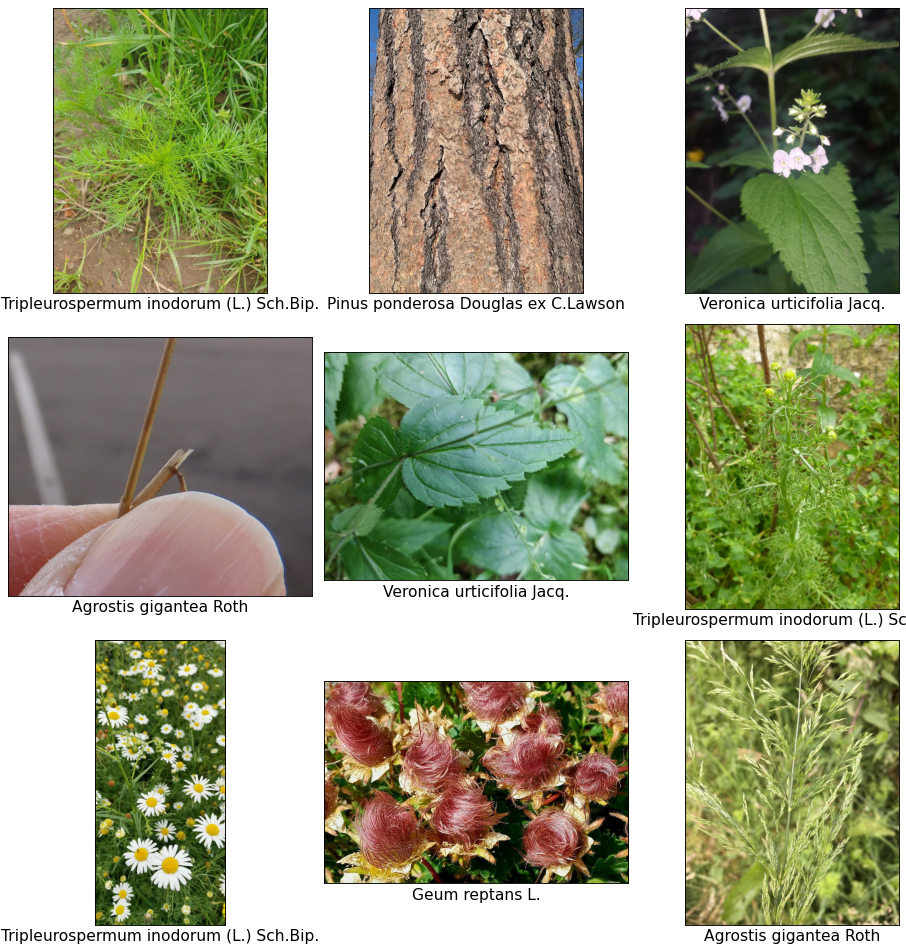

In [5]:
from plantclef.plotting import plot_images_from_binary

# Collect binary image data from DataFrame
rows, cols = 3, 3
subset_df = train_df.limit(rows * cols).collect()
image_data_list = [row["data"] for row in subset_df]
binomial_names = [row["genus"] for row in subset_df]

# Display the images in a grid with binomial names
plot_images_from_binary(
    train_df, data_col="data", image_col="species", grid_size=(3, 3)
)

In [6]:
# Count number of rows in the train DataFrame
train_df.count()

1408033

### test images

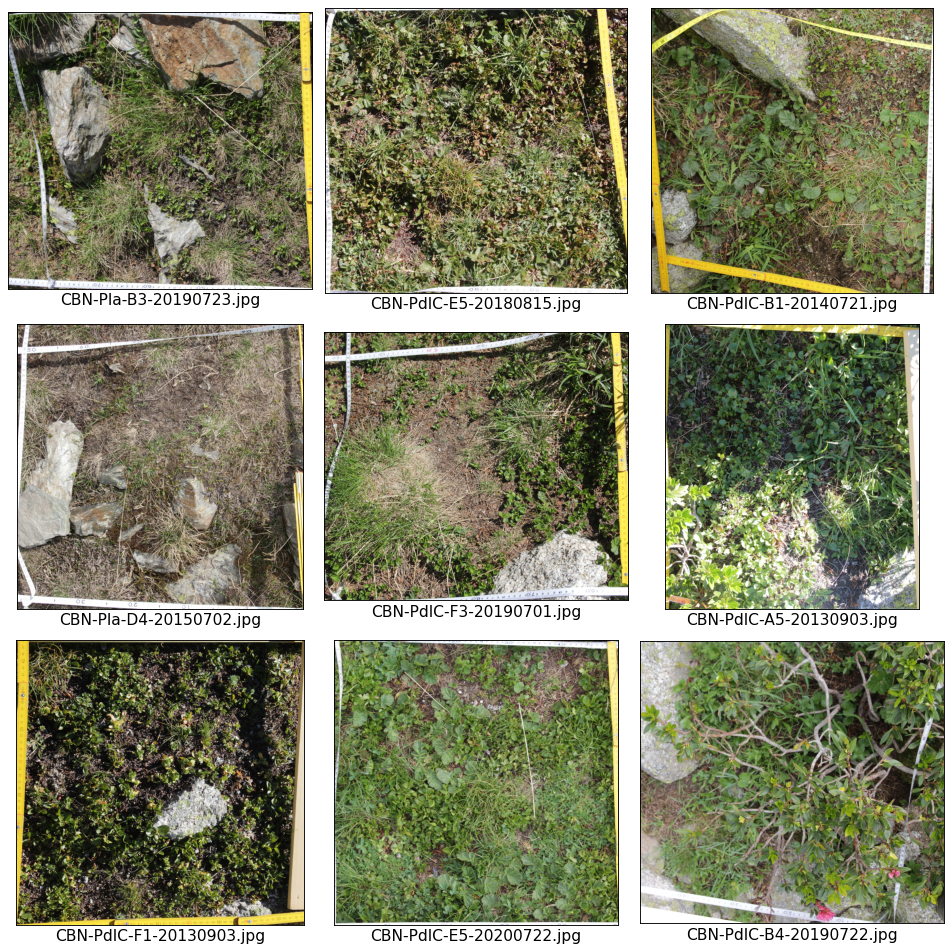

In [7]:
# Collect binary image data from DataFrame
rows, cols = 3, 3
subset_df = test_df.limit(rows * cols).collect()
image_data_list = [row["data"] for row in subset_df]
image_names = [row["image_name"].replace(".jpg", "") for row in subset_df]

# Display the images in a grid with binomial names
plot_images_from_binary(
    test_df, data_col="data", image_col="image_name", grid_size=(3, 3)
)

In [8]:
test_df.count()

2105

### subset DF

In [ ]:
# Define the path to the train and test parquet files
subset_path = f"{data_path}/subset_top5_train"

# Read the parquet files into a spark DataFrame
subset_df = spark.read.parquet(subset_path)

# Show the data
subset_df.printSchema()
subset_df.show(n=5)

root
 |-- species_id: integer (nullable = true)
 |-- image_name: string (nullable = true)
 |-- path: string (nullable = true)
 |-- data: binary (nullable = true)
 |-- organ: string (nullable = true)
 |-- obs_id: long (nullable = true)
 |-- license: string (nullable = true)
 |-- partner: string (nullable = true)
 |-- author: string (nullable = true)
 |-- altitude: double (nullable = true)
 |-- latitude: double (nullable = true)
 |-- longitude: double (nullable = true)
 |-- gbif_species_id: string (nullable = true)
 |-- species: string (nullable = true)
 |-- genus: string (nullable = true)
 |-- family: string (nullable = true)
 |-- dataset: string (nullable = true)
 |-- publisher: string (nullable = true)
 |-- references: string (nullable = true)
 |-- url: string (nullable = true)
 |-- learn_tag: string (nullable = true)
 |-- image_backup_url: string (nullable = true)



+----------+--------------------+--------------------+--------------------+------+----------+--------------------+-------+-----------------+--------+-----------------+------------+---------------+--------------------+--------+--------+--------+-----------+--------------------+--------------------+---------+--------------------+
|species_id|          image_name|                path|                data| organ|    obs_id|             license|partner|           author|altitude|         latitude|   longitude|gbif_species_id|             species|   genus|  family| dataset|  publisher|          references|                 url|learn_tag|    image_backup_url|
+----------+--------------------+--------------------+--------------------+------+----------+--------------------+-------+-----------------+--------+-----------------+------------+---------------+--------------------+--------+--------+--------+-----------+--------------------+--------------------+---------+--------------------+
|   174162

In [12]:
subset_df.count()

3760

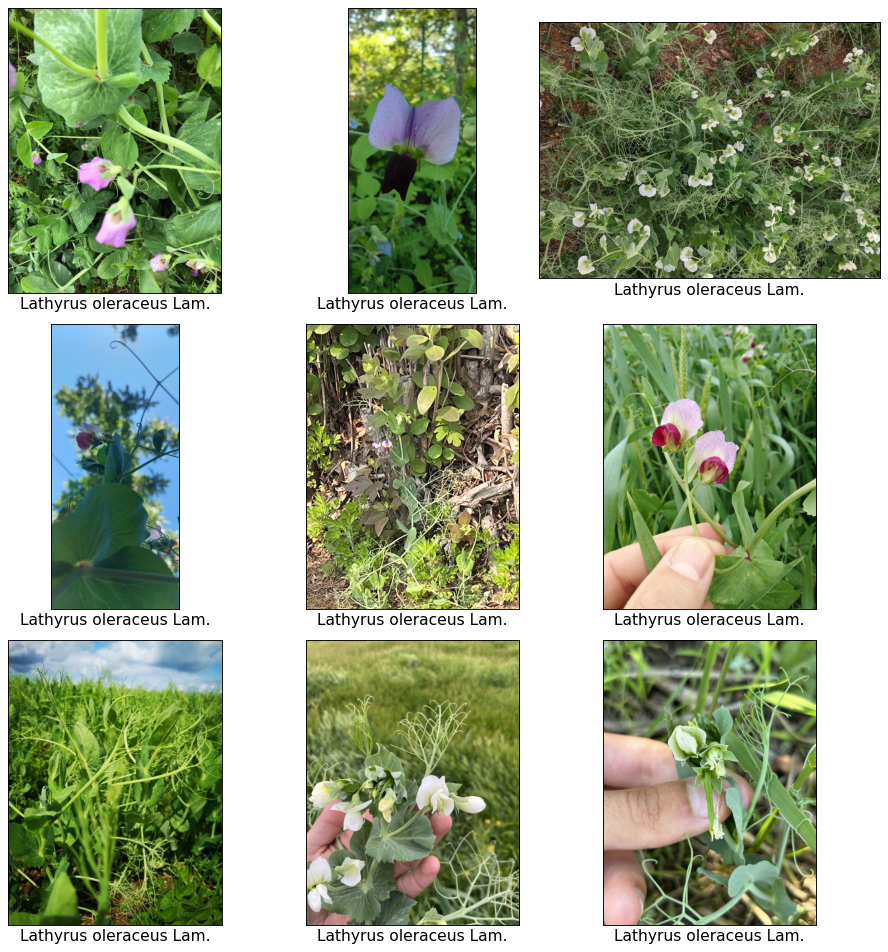

In [14]:
# Collect binary image data from DataFrame
rows, cols = 3, 3
subset_limit_df = subset_df.limit(rows * cols).collect()
image_data_list = [row["data"] for row in subset_limit_df]
image_names = [row["image_name"].replace(".jpg", "") for row in subset_limit_df]

# Display the images in a grid with binomial names
plot_images_from_binary(
    subset_df, data_col="data", image_col="species", grid_size=(3, 3)
)

### test 2024 dataset

In [ ]:
# Path and dataset names
data_path = f"{root}/p-dsgt_clef2025-0/shared/plantclef/data/parquet/"

# Define the path to the train and test parquet files
test_2024_path = f"{data_path}/test_2024"

# Read the parquet files into a spark DataFrame
test_2024_df = spark.read.parquet(test_2024_path)

# Show the data
test_2024_df.printSchema()
test_2024_df.show(n=5)
# count the number of rows
print(f"Test 2024 dataset count: {test_2024_df.count()} rows")

root
 |-- image_name: string (nullable = true)
 |-- path: string (nullable = true)
 |-- data: binary (nullable = true)



+--------------------+--------------------+--------------------+
|          image_name|                path|                data|
+--------------------+--------------------+--------------------+
|CBN-PdlC-C6-20130...|/test_2024/images...|[FF D8 FF E0 00 1...|
|CBN-Pla-D3-201508...|/test_2024/images...|[FF D8 FF E0 00 1...|
|CBN-PdlC-C3-20190...|/test_2024/images...|[FF D8 FF E0 00 1...|
|CBN-PdlC-C1-20200...|/test_2024/images...|[FF D8 FF E0 00 1...|
|CBN-PdlC-B2-20160...|/test_2024/images...|[FF D8 FF E0 00 1...|
+--------------------+--------------------+--------------------+
only showing top 5 rows



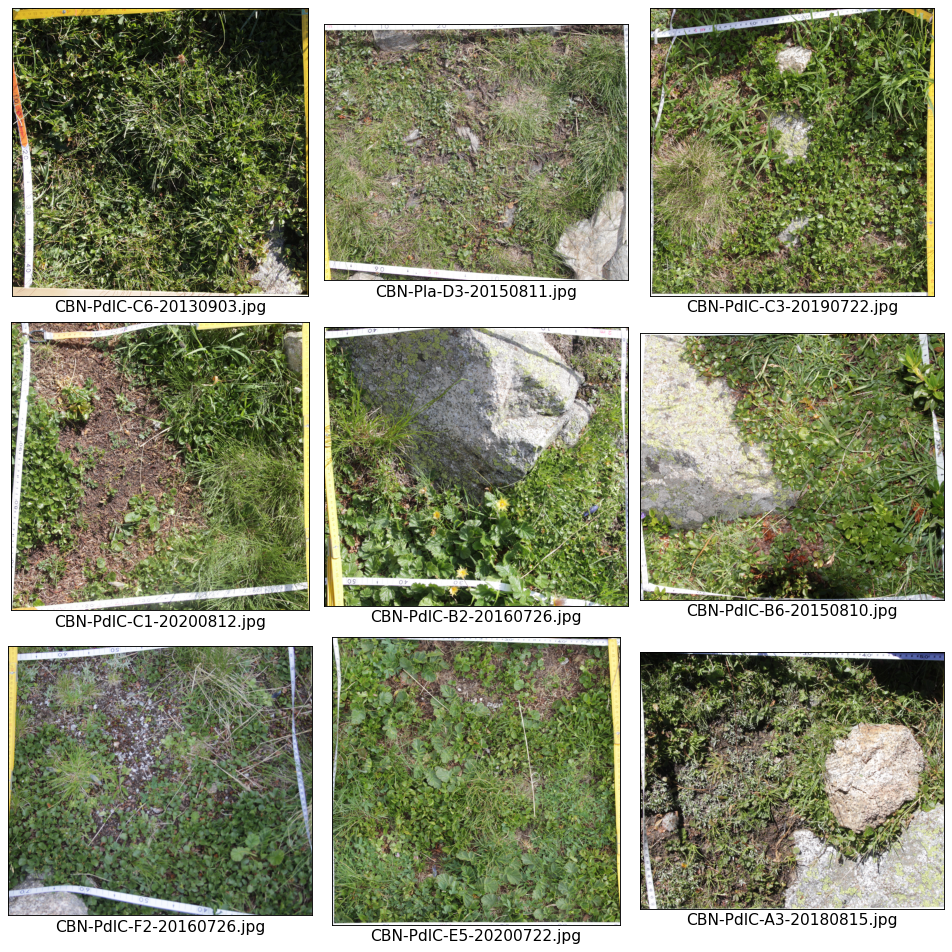

In [9]:
from plantclef.plotting import plot_images_from_binary

# Display the images in a grid with binomial names
plot_images_from_binary(
    test_2024_df, data_col="data", image_col="image_name", grid_size=(3, 3)
)